# Teorema de Bayes, distribuciones previas y previas conjugadas

![bayes](https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg)

> Justo como ilustra la imagen de arriba, dadas dos VA $A$ y $B$, el Teorema de Bayes se puede escribir como:
> 
> $$
  P(A | B) = \frac{P(B | A) P(A)}{P(B)}
  $$
  
> En este notebook recapitularemos qué significa cada uno de esos elementos, estudiaremos porqué es complejo el cálculo exacto de la distribución posterior, y veremos un método analítico para hacer este cálculo exacto.

> **Objetivos:**
> - Explicar porqué el cálculo exacto de la distribución posterior es una tarea intratable en muchas ocasiones.
> - Principio de Maximum Aposteriori (MAP).
> - Comprender el concepto de distribución previa conjugada.

> **Referencias:**
> - Bayesian Methods for Machine Learning course, HSE University, Coursera.
> - Statistical Rethinking, Richard McElreath, 2018.

## 1. Teorema de Bayes

Como ya vimos, el enfoque Bayesiano considera que los parámetros $\theta$ son los que se consideran aleatorios, y los datos $X$ están fijos como evidencia.

En ese sentido, nos interesa modelar la distribución de los parámetros dada la evidencia que estamos observando $P(\theta | X)$, lo cual, por el Teorema de Bayes podemos escribir como:

$$
P(\theta | X) = \frac{P(X | \theta) P(\theta)}{P(X)},
$$

donde:
- $P(\theta | X)$ se conoce como **distribución posterior** (en inglés *posterior*). La posterior nos dice la probabilidad de los parámetros después de haber observado los datos.
- $P(X | \theta)$ se conoce como **función de verosimilitud** (en inglés *likelihood*). La verosimilitud nos dice que tan bien los parámetros explican los datos.
- $P(\theta)$ se conoce como **distribución previa** (en inglés *prior*). En la previa, incluimos todo el conocimiento que podamos tener acerca de los parámetros.
- $P(X)$ se conoce como **distribución de evidencia** (en inglés *evidence*).

#### ¿Qué es la (distribución de) evidencia $P(X)$?

Ejemplos:

1. Imaginemos que estamos trabajando con visión por computadora de imágenes de diferentes artistas (por ejemplo Van Gogh,  DaVinci, Monet). ¿Qué es $P(X)$?

   **Respuesta**

2. Imaginemos que estamos estimando la probabilidad de que un cliente compre en nuestra e-commerce en las siguientes dos semanas (clasificador binario). En este caso:

   $$
   P(\theta | X, y) = \frac{P(y | X, \theta) P(\theta | X)}{P(y | X)},
   $$

   ¿Qué es $P(y | X)$?
   
   **Respuesta**

Por tanto, modelar la distribución de evidencia es una tarea bastante compleja que en la mayoría de los casos no somos capaces de realizar. 

Por tanto, en esta clase, estaremos estudiando metodologías analíticas para evitar el cálculo de la distribucion de evicencia.

## 2. Maximum Aposteriori (MAP)

En ciertas ocasiones no nos interesa modelar toda la distribución de los parámetros, sino simplemente encontrar el valor *más probable* de los parámetros dadas las observaciones. Esto da lugar al estimador MAP:

$$
\theta_{MAP} = \arg \max_{\theta} P(\theta | X),
$$

el cual, usando el Teorema de Bayes se puede escribir como:

$$
\theta_{MAP} = \arg \max_{\theta} \frac{P(X | \theta) P(\theta)}{P(X)}.
$$

Sin embargo, como la evidencia $P(X)$ no depende de los parámetros $\theta$:

$$
\theta_{MAP} = \arg \max_{\theta} P(X | \theta) P(\theta).
$$

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/4/49/Emoticon_Face_Smiley_GE.png" width="500px" height="300px" />

De esta manera, observamos que para el cálculo del estimador MAP, evitamos completamente el cálculo de la distribución de evidencia. El problema de estimación resultante lo podemos resolver de manera eficiente usando métodos numéricos.

#### Y si siempre nos quedamos con el estimador MAP, ¿Cuál es el problema?

Si solamente nos quedáramos con el estimador MAP, el enfoque Bayesiano pierde el sentido. Recordamos que bajo el enfoque Bayesiano nos interesa modelar la incertidumbre de los parámetros ante las observaciones que hacemos del mundo, y con un estimador MAP obtenemos los valores **fijos** más probables de los parámetros.

Esto tiene varias implicaciones:

1. Habíamos dicho que una de las ventajas del enfoque Bayesiano era que nos permitía hacer aprendizaje on-line, solo haciendo los cálculos relativos a cada paso:
   
   $$
   P_k(\theta) = P(\theta | x_k) = \frac{P(x_k | \theta) P_{k-1}(\theta)}{P(x_k)}.
   $$
   
   Sin embargo, no podemos usar la estimación MAP como nueva previa en el próximo paso, debido a que sería una función impulso:
   
   $$
   P_{k-1}(\theta) = \delta(\theta - \theta_{MAP}) = \left\{\begin{array}{cc}
   1 & \text{si } \theta=\theta_{MAP} \\
   0 & \text{en otro caso}
   \end{array}\right.,
   $$
   
   y esto no nos aportaría información al siguiente paso:
   
   $$
   P_k(\theta) = P(\theta | x_k) = \frac{P(x_k | \theta) \delta(\theta - \theta_{MAP})}{P(x_k)} = \delta(\theta - \theta_{MAP}).
   $$

2. Podríamos caer en un caso donde $\theta_{MAP}$ sea un valor atípico, y aunque sea el "más probable", la mayoría de los datos estén concentrados en otra región. Por ejemplo

In [1]:
# Importar matplotlib.pyplot
from matplotlib import pyplot as plt
# Importar scipy.stats.norm
from scipy.stats import norm
# Importar numpy
import numpy as np

In [13]:
# Definir VA X, Y
X = norm(loc=5, scale=1)
Y = norm(loc=8, scale=0.1)

In [16]:
# Suma ponderada de densidades
x = np.linspace(0, 10, 1000)
pdf_Z = 0.8 * X.pdf(x) + 0.2 * Y.pdf(x)

Text(0.5, 0, '$\\theta$')

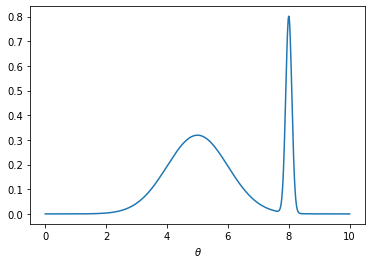

In [17]:
# Graficar densidad de Z
plt.plot(x, pdf_Z)
plt.xlabel(r'$\theta$')

3. Si solo estimamos un punto, no podríamos estimar regiones de credibildiad (intervalos de confianza).

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/c/cb/029-sad-but-relieved-face.svg" width="500px" height="300px" />

## 3. Distribuciones conjugadas

De manera que los estimadores MAP son bastante útiles en ciertas aplicaciones, pero si queremos aún más flexibilidad en cuanto a la estimación de la distribución de los parámetros, no nos es útil.

Si queremos estimar esta distribucion dadas las observaciones debemos buscar otros caminos. Uno de ellos son las **distribuciones conjugadas**.

Recapitulando, la distribución posterior la podemos escribir como:

$$
P(\theta | X) = \frac{P(X | \theta) P(\theta)}{P(X)},
$$

donde:

- La función de verosimilitud $P(X | \theta)$ la fija el modelo.
- La distribución de evidencia $P(X)$ la fijan los datos.

Peeeero, la distribución previa es algo que podemos elegir de acuerdo a **nuestra experiencia, conocimiento previo o simplemente para acomodar los cálculos**.

Es decir, podríamos elegir la distribución previa $P(\theta)$ con el único fin de evitar el cálculo de la la distribución de evidencia $P(X)$.

> *Definición.* (**Previa conjugada**) Decimos que la distribución previa $P(\theta)$ es conjugada a la función de verosimilitud $P(X | \theta)$, si la distribución posterior pertenece a la misma familia de distribuciones que la distribución previa.

¿Cómo es esto posible?

Supongamos que tenemos dos dos densidades normales distintas.

In [18]:
# Definir VA X, Y
# Las definimos arriba
X, Y

(<scipy.stats._distn_infrastructure.rv_frozen at 0x7fa524a6f990>,
 <scipy.stats._distn_infrastructure.rv_frozen at 0x7fa524a6f510>)

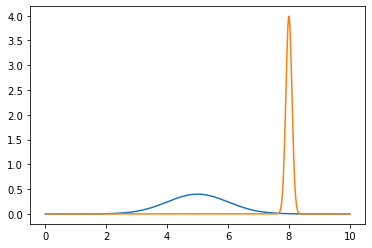

In [19]:
# Graficar densidades
plt.plot(x, X.pdf(x), label='densidad X')
plt.plot(x, Y.pdf(x), label='densidad Y')

Si multiplicamos estas dos densidades, y renormalizamos para que la integral de $1$, obtenemos de nuevo una distribución normal:

In [20]:
def prod_pdf(x):
    return X.pdf(x) * Y.pdf(x)

(7, 9)

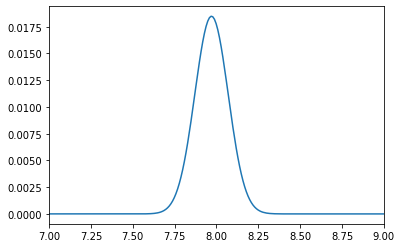

In [22]:
# Graficar densidad de Z
plt.plot(x, prod_pdf(x), label='densidad producto')
plt.xlim([7, 9])

In [23]:
from scipy.integrate import quad

In [24]:
quad?

In [29]:
result = quad(prod_pdf, 0, 10)

In [30]:
result

(0.004610775369410589, 8.811727109421574e-09)

Matemáticamente, sean $X_1 \sim \mathcal{N}(\mu_1, \sigma_1^2)$ y $X_2 \sim \mathcal{N}(\mu_2, \sigma_2^2)$. Entonces:

\begin{align}
\mathcal{N}(x | \mu_1, \sigma_1^2) \mathcal{N}(x | \mu_2, \sigma_2^2) & \propto \exp\left\{-\frac{(x - \mu_1)^2}{2 \sigma_1^2}\right\} \exp\left\{-\frac{(x - \mu_2)^2}{2 \sigma_2^2}\right\} \\
& = \exp\left\{-\frac{(x - \mu_1)^2}{2 \sigma_1^2} -\frac{(x - \mu_2)^2}{2 \sigma_2^2} \right\} \\
& = \exp\left\{-\frac{\sigma_2^2(x - \mu_1)^2 + \sigma_1^2(x - \mu_2)^2}{2 \sigma_1^2 \sigma_2^2}\right\} \\
& = \exp\left\{-\frac{(x - \bar{\mu})^2}{2 \bar{\sigma}^2} + const\right\} \\
& \propto \exp\left\{-\frac{(x - \bar{\mu})^2}{2 \bar{\sigma}^2}\right\}
\end{align}

De modo que el producto vuelve a ser (proporcional a) una densidad normal. Ver [el siguiente enlace](https://www.johndcook.com/blog/2012/10/29/product-of-normal-pdfs/).

Con base en lo anterior, tomando la posterior:

$$
P(\theta | X) = \frac{P(X | \theta) P(\theta)}{P(X)},
$$

Si la función de verosimilitud $P(X | \theta) = \mathcal{N}(X | \theta, \sigma^2)$, y la previa se selecciona como:

$$
P(\theta) = \mathcal{N}(\theta | m, s^2),
$$

obtenemos:

$$
P(\theta | X) = \mathcal{N}(\theta | a, b^2).
$$

Es decir, para una distribución normal sobre los datos con media $\theta$, la previa conjugada es una distribución normal sobre $\theta$.

#### ¿Y qué pasa con la evidencia?

Recordemos que la distribución posterior es una distribución **sobre los parámetros**. Debido a que la distribución de evidencia no depende de los parámetros, la podemos pensar como una constante de normalización para que la distribución resultante integre (sume) uno.

Esto es una buena noticia, porque operacionalmente, no nos debemos preocupar mucho por las constantes que hacen que la distribución integre a uno. Debemos tener especial cuidado con que **la densidad resultante tenga la misma forma funcional que la previa**.

**Ejercicio:** supongamos que la función de verosimilitud y la distribución previa son:

$$
p(x | \theta) = \mathcal{N}(x |\theta, 1) \qquad p(\theta) = \mathcal{N}(\theta |0, 1)
$$

Encontrar completamente la densidad de probabilidad posterior

$$
p(\theta | x) = \frac{p(x | \theta) p(\theta)}{p(x)}.
$$

<font color=green>En clase ...</font>

Veremos algunos ejemplos adicionales, pero antes debemos aprender un par de distribuciones más.

## 4. Algunas distribuciones de probabilidad importantes

### 4.1. Distribución Gamma

Es una distribución continua, cuyo soporte son los reales positivos ($x\in\mathbb{R}_+$), de dos parámetros $a, b >0$, cuya función de densidad de probabilidad es:

$$
\Gamma(x | a, b) = \frac{b^a}{\Gamma(a)} x^{a - 1} \exp\{-b x\}
$$

In [ ]:
# Importar scipy.stats.gamma
from scipy.stats import gamma

In [ ]:
gamma?

In [ ]:
# Graficar para diferentes valores de a y b
x = np.linspace(0, 5, 100)
plt.plot(x, gamma.pdf(x, a=1, scale=1 / 2), label="$a=1, b=2$")
plt.plot(x, gamma.pdf(x, a=2, scale=1 / 2), label="$a=2, b=2$")
plt.plot(x, gamma.pdf(x, a=3, scale=1 / 2), label="$a=3, b=2$")
plt.plot(x, gamma.pdf(x, a=0.5, scale=1 / 1), label="$a=0.5, b=1$")
plt.legend()

Si $X \sim \Gamma(a, b)$, algunos estadísticos importantes son:

$$
E[X] = \frac{a}{b}
$$

$$
Mode[X] = \frac{a - 1}{b}, \quad \text{para } a > 1
$$

$$
Var[X] = \frac{a}{b^2}
$$

La distribución Gamma es importante porque es la previa conjugada para la **precisión** en una verosimilitud normal.

¿Qué es la precisión? Es el recíproco de la varianza. Es decir, la densidad

$$
\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\},
$$

en términos de la precisión $\gamma = \frac{1}{\sigma^2}$ es

$$
\mathcal{N}\left(x | \mu, \gamma^{-1}\right) = \frac{\sqrt{\gamma}}{\sqrt{2 \pi}} \exp\left\{-\gamma\frac{(x - \mu)^2}{2}\right\}.
$$

¿Cuál es la previa conjugada respecto a la precisión? La respuesta es la distribución Gamma. Veamos

$$
p(\gamma | x) = \frac{p(x | \gamma) p(\gamma)}{p(x)} \propto p(x | \gamma) p(\gamma)
$$

Si la verosimilitud es normal con parámetro la precisión: $p(x | \gamma) = \mathcal{N}\left(x | \mu, \frac{1}{\gamma}\right) \propto \gamma^{1/2} \exp\left\{-\gamma s\right\}$, con $s=\frac{(x - \mu)^2}{2}$, y la previa es una distribución gamma: $p(\gamma) = \Gamma(\gamma|a,b) \propto \gamma^{a-1} \exp\{-b \gamma\}$, entonces

$$
p(\gamma | x) \propto \gamma^{1/2} \exp\left\{-\gamma s\right\} \gamma^{a-1} \exp\{-b \gamma\} = \gamma^{a - 1/2} \exp\{-(s+b) \gamma\},
$$

esto es:

$$
p(\gamma | x) = \Gamma(\gamma|a+1/2,b+s) 
$$

### 4.2. Distribución Beta

Es una distribución continua, cuyo soporte es el intervalo $[0, 1]$, de dos parámetros $a, b>0$, cuya función de densidad de probabilidad es:

$$
B(x | a, b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} x^{a - 1} (1 - x)^{b - 1}
$$

In [ ]:
# Importar scipy.stats.gamma
from scipy.stats import beta

In [ ]:
# Graficar para diferentes valores de a y b
x = np.linspace(0, 1, 100)
plt.plot(x, beta.pdf(x, a=0.5, b=0.5), label="$a=0.5, b=0.5$")
plt.plot(x, beta.pdf(x, a=1, b=1), label="$a=1, b=1$")
plt.plot(x, beta.pdf(x, a=2, b=2), label="$a=2, b=2$")
plt.plot(x, beta.pdf(x, a=2, b=5), label="$a=2, b=5$")
plt.plot(x, beta.pdf(x, a=10, b=5), label="$a=10, b=5$")
plt.plot(x, beta.pdf(x, a=10, b=10), label="$a=10, b=10$")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))

Si $X \sim Beta(a, b)$, algunos estadísticos importantes son:

$$
E[X] = \frac{a}{a + b}
$$

$$
Mode[X] = \frac{a - 1}{a + b - 2}, \quad \text{para } a > 1, \text{ y } b > 1
$$

$$
Var[X] = \frac{ab}{(a + b)^2(a + b - 1)}
$$

Los parámetros $a$ y $b$ son conocidos como "pseudo-counts".

La distribución Beta es importante porque es la previa conjugada para la verosimilitud de Bernoulli.

___
#### Distribución de Bernoulli

Supongamos que tenemos el experimento trillado de tirar una moneda al aire, y sabemos que cae cara con probabilidad $\theta$ y sello con probabilidad $1 - \theta$.

Asignamos la VA $X$ de la siguiente manera:

$$
X = \left\{\begin{array}{cc}
1 & \text{si cara} \\
0 & \text{si sello} \\
\end{array}\right.
$$

Una suposición plausible es que cada tiro de la moneda es independiente.

Supongamos que hemos tirado $5$ veces la moneda obteniendo los siguientes datos:

$$
D = \{ 1, 1, 0, 1, 0\}.
$$

En este sentido, la verosimilitud de los datos es:

$$
P(D | \theta) = \prod_{i=1}^{5} P(X_i | \theta) = \theta^{3}(1 - \theta)^{2}.
$$

En general, si la moneda cae $N_1$ veces cara y $N_0$ veces sello, la verosimilitud sería:

$$
P(D | \theta) = \theta^{N_1}(1 - \theta)^{N_0},
$$

donde $N=N_0+N_1$ es el número total de tiros.
___

Ya que tenemos todo claro, veamos que la distribución Beta es la previa conjugada para la verosimilitud de Bernoulli:

$$
p(\theta | X) = \frac{p(X | \theta) p(\theta)}{p(X)} \propto p(X | \theta) p(\theta)
$$

Si la verosimilitud es de Bernoulli con probabilidad $\theta$: $p(X | \theta) = \theta^{N_1}(1 - \theta)^{N_0}$, y la previa es una distribución Beta: $p(\theta) = B(\theta | a, b) \propto \theta^{a - 1} (1 - \theta)^{b - 1}$, entonces

$$
p(\theta | X) \propto \theta^{N_1}(1 - \theta)^{N_0} \theta^{a - 1} (1 - \theta)^{b - 1} = \theta^{a + N_1 - 1} (1 - \theta)^{b + N_0 -1},
$$

esto es:

$$
p(\theta | X) = B(\theta | a + N_1, b + N_0).
$$

**Ilustración:**

Definimos la variable aleatoria (discreta) binomial:

$$
X = \left\{ \begin{array}{ccc} 1 & \text{si} & \text{la moneda cae cara} \\
                               0 & \text{si} & \text{la moneda cae sello} \end{array} \right.
$$

con función de masa de probabilidad dada por:

- $P(X=1) = P(X=1 | \theta) = \theta$;
- $P(X=0) = P(X=0 | \theta) = 1 - P(X=1) = 1 - \theta$.

De esta manera, la función de verosimilitud satisface:

$$
P(\mathcal{D} | \theta) = \mathcal{L}(\theta) = \theta^{N_1} (1 - \theta)^{N_0}.
$$

Acabamos de demostrar que la distribución Beta sobre el parámetro $\theta$ es la previa conjugada:

$$
P(\theta) = Beta(\theta | a, b) \propto \theta^{a-1} (1 - \theta)^{b - 1}
$$

**Recibimos datos de otros 100 tiros de la moneda**

## Conclusión

Para evitar el cálculo de la distribución de evidencia vimos dos posibilidades:

1. Estimador MAP:
   - Obtenemos el parámetro más probable dada la evidencia.
   - No se modela la distribución; obtenemos un valor fijo.
   - No se puede usar para aprendizaje on-line.
   - Podríamos estimar un valor atípico.
   
2. Previas conjugadas:
   - Seleccionamos la distribución previa para evitar el cálculo de la evidencia.
   - Modelamos la distribución posterior.
   - Se puede usar para aprendizaje on-line.
   - Al selecciónar la previa conjugada con el fin de evitar el cálculo de la evidencia, es posible que esto vaya en contra de la intuición o conocimiento previo que tengamos acerca del problema. No siempre la previa conjugada es adecuada.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>